In [46]:
import numpy
import matplotlib.pyplot as plt
import pandas
import glob

In [6]:
%matplotlib inline

In [2]:
data = numpy.loadtxt('data_for_peter/001_CO2.csv', delimiter=',')

ValueError: could not convert string to float: 

In [3]:
import pandas

In [50]:
datasets = []
for filename in glob.glob('data_for_peter/*.csv'):
    data = pandas.read_csv(filename, sep=',', header=None,
                           index_col=0, usecols=range(8),
                           names=('index','DATE', 'TIME', 'CO2', 'O2', 'Temp', 'Humidity', 'Pressure'),
                           skiprows=1)
    datasets.append(data)

In [44]:
data.iloc[:10]

,DATE,TIME,CO2,O2,Temp,Humidity,Pressure
index,,,,,,,
1,03-03-2015,12:21:40,676,21,36.7,34.0,1003
2,03-03-2015,12:21:50,669,21,36.7,33.9,1002
3,03-03-2015,12:22:00,663,21,36.6,33.9,1004
4,03-03-2015,12:22:10,659,21,36.6,33.9,1003
5,03-03-2015,12:22:20,655,21,36.6,34.0,1003
6,03-03-2015,12:22:30,650,21,36.6,34.1,1003
7,03-03-2015,12:22:40,648,21,36.6,34.2,1003
8,03-03-2015,12:22:50,648,21,36.6,34.1,1003
9,03-03-2015,12:23:00,647,21,36.6,34.1,1003


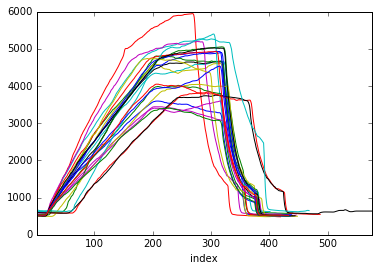

In [51]:
plt.figure()
for data in datasets:
    data['CO2'].plot()


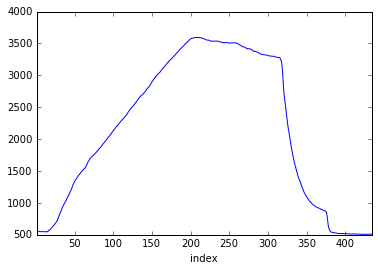

In [52]:
plt.figure()
datasets[0]['CO2'].plot()

In [54]:
data = datasets[0]
print(len(data))

434


In [107]:
def curve(x_range, a1, a2, A, b1, b2, B, c1, c2, C, d1, d2, D, e1, e2, E, f1, f2):
    results = []
    for x in x_range:
        if x <= A:
            y = a1*x + a2
        elif x > A and x <= B:
            y = b1*(x - A) + b2
        elif x > B and x <= C:
            y = c1*(x - B) + c2
        elif x > C and x <= D:
            y = d1*(x - C) + d2
        elif x > D and x <= E:
            y = e1*(x - D) + e2
        elif x > E:
            y = f1*(x - E) + f2
        results.append(y)
    return results

In [119]:
sim_data = curve(range(len(data)),
                  a1=0, a2=500, A=20,
                  b1=15, b2=500, B=180,
                  c1=-0.5, c2=3500, C=310,
                  d1=-15, d2=4500, D=380,
                  e1=-2, e2=1500, E=390,
                  f1=1, f2=100)
print(sim_data)

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 515, 530, 545, 560, 575, 590, 605, 620, 635, 650, 665, 680, 695, 710, 725, 740, 755, 770, 785, 800, 815, 830, 845, 860, 875, 890, 905, 920, 935, 950, 965, 980, 995, 1010, 1025, 1040, 1055, 1070, 1085, 1100, 1115, 1130, 1145, 1160, 1175, 1190, 1205, 1220, 1235, 1250, 1265, 1280, 1295, 1310, 1325, 1340, 1355, 1370, 1385, 1400, 1415, 1430, 1445, 1460, 1475, 1490, 1505, 1520, 1535, 1550, 1565, 1580, 1595, 1610, 1625, 1640, 1655, 1670, 1685, 1700, 1715, 1730, 1745, 1760, 1775, 1790, 1805, 1820, 1835, 1850, 1865, 1880, 1895, 1910, 1925, 1940, 1955, 1970, 1985, 2000, 2015, 2030, 2045, 2060, 2075, 2090, 2105, 2120, 2135, 2150, 2165, 2180, 2195, 2210, 2225, 2240, 2255, 2270, 2285, 2300, 2315, 2330, 2345, 2360, 2375, 2390, 2405, 2420, 2435, 2450, 2465, 2480, 2495, 2510, 2525, 2540, 2555, 2570, 2585, 2600, 2615, 2630, 2645, 2660, 2675, 2690, 2705, 2720, 2735, 2750, 2765, 2780, 2795, 2810, 282

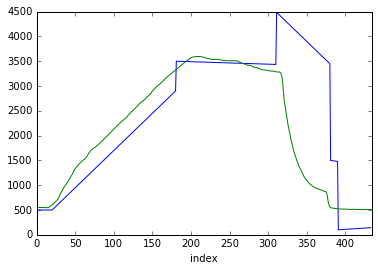

In [111]:
plt.figure()
plt.plot(sim_data)
data['CO2'].plot()

In [113]:
from scipy.optimize import curve_fit

In [118]:
(optimal_params, pcov) = curve_fit(curve, range(len(data)), data['CO2'], 
                                  (0, 500, 20, 15, 500, 180, -0.5, 3500, 310, -15, 6500, 380, -2, 1500, 390, 1, 100))

/home/pvh/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [120]:
# this gets junk params, find another parameter optimiser
print(optimal_params)

[ -7.94484674e-01   2.32668105e+03   6.24308471e+03   1.63493745e+01
   9.41457773e+04  -7.10992263e+04  -1.81666007e+00   3.92234890e+04
  -4.41003153e+04  -3.66865891e+01   6.68986647e+05  -2.19707288e+04
  -2.28484848e+00   4.52455242e+04   9.84838032e+03  -3.03986711e-01
   9.97785873e+03]


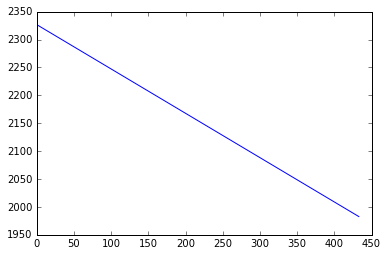

In [117]:
plt.figure()
plt.plot(curve(range(len(data)), *optimal_params))